In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

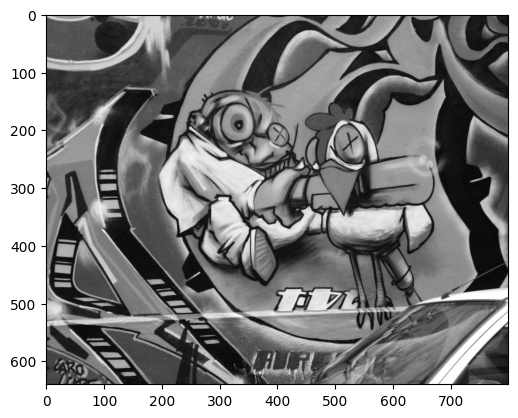

In [2]:
image = cv2.imread("./cartoon1.pgm", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, "gray")
plt.show()

In [3]:
def show_image(image: np.ndarray, title: str, *subplot_args: int) -> None:
    plt.subplot(*subplot_args)
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis(False)

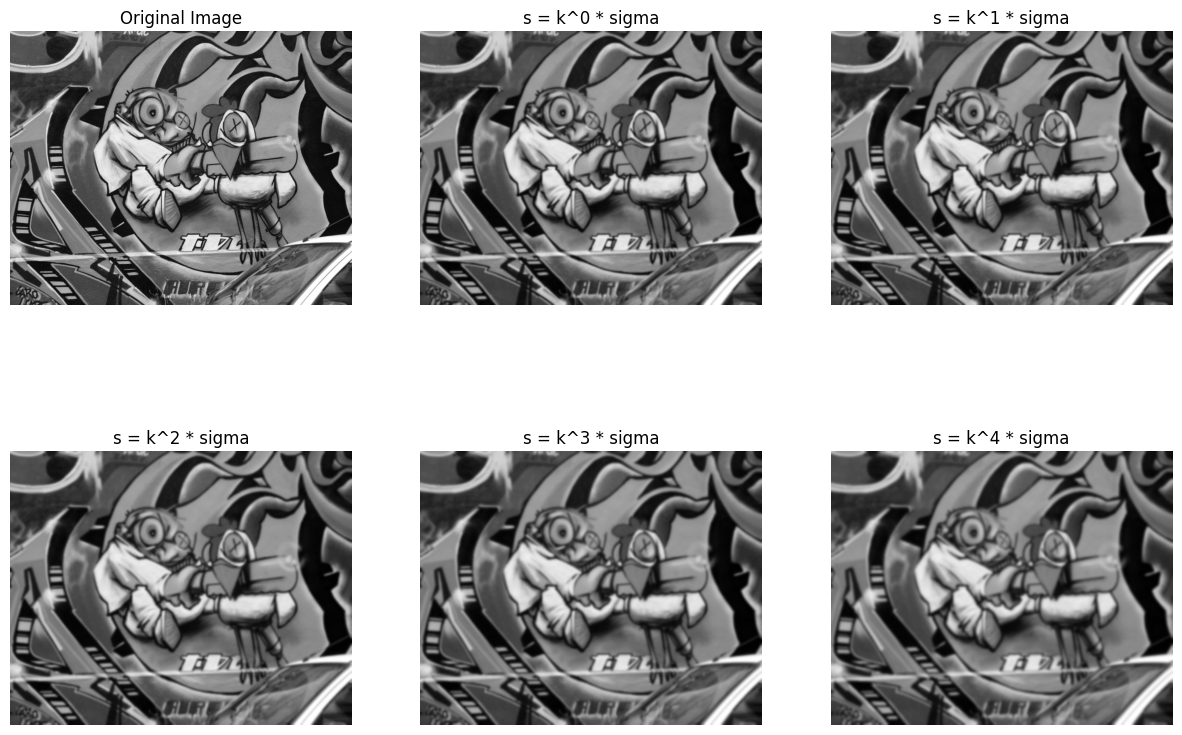

In [4]:
k = 1.15
sigma = 1.6

plt.figure(figsize=(15, 10))
show_image(image, "Original Image", 2, 3, 1)

# Blur the image with sigma, k*sigma, k^2*sigma, k^3*sigma, k^4*sigma and show the five images
blurred_images = []
for i in range(5):
    s = k**i * sigma
    blurred_image = cv2.GaussianBlur(image, ksize=(17, 17), sigmaX=s, sigmaY=s)
    blurred_images.append(blurred_image)
    show_image(blurred_image, f"s = k^{i} * sigma", 2, 3, i + 2)

plt.show()

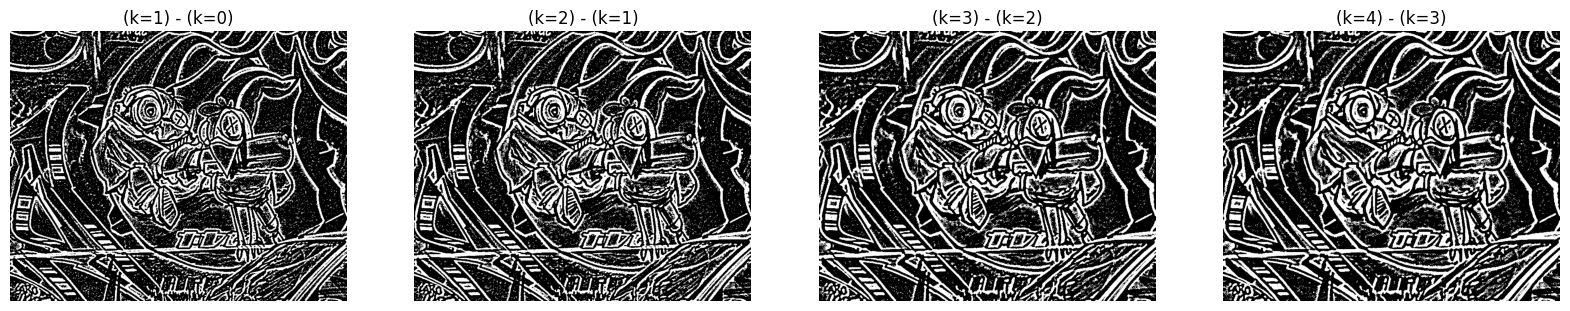

In [5]:
from itertools import pairwise

# compute the Different of gaussian and plot 4 DoGs

plt.figure(figsize=(20, 20))

for i, (current_image, next_image) in enumerate(pairwise(blurred_images)):
    diff_of_gaussian = next_image - current_image
    show_image(
        diff_of_gaussian, f"(k={i+1}) - (k={i})", 1, len(blurred_images) - 1, i + 1
    )
plt.show()

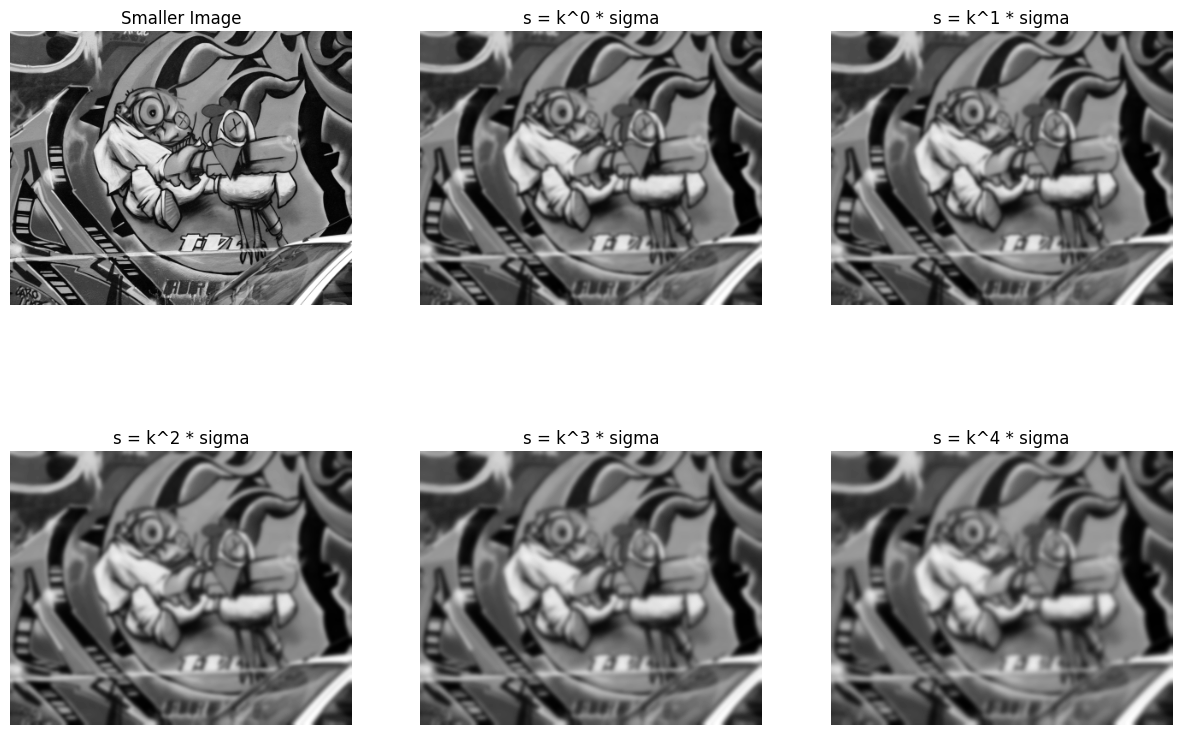

In [27]:
# Compute the next octave and show the result
small_image = cv2.resize(image, None, fx=0.5, fy=0.5)

plt.figure(figsize=(15, 10))
show_image(small_image, "Smaller Image", 2, 3, 1)

# Blur the smaller image with sigma, k*sigma, k^2*sigma, k^3*sigma, k^4*sigma and show the five images
blurred_images = []
for i in range(5):
    s = k**i * sigma
    blurred_image = cv2.GaussianBlur(small_image, ksize=(17, 17), sigmaX=s, sigmaY=s)
    blurred_images.append(blurred_image)
    show_image(blurred_image, f"s = k^{i} * sigma", 2, 3, i + 2)

plt.show()

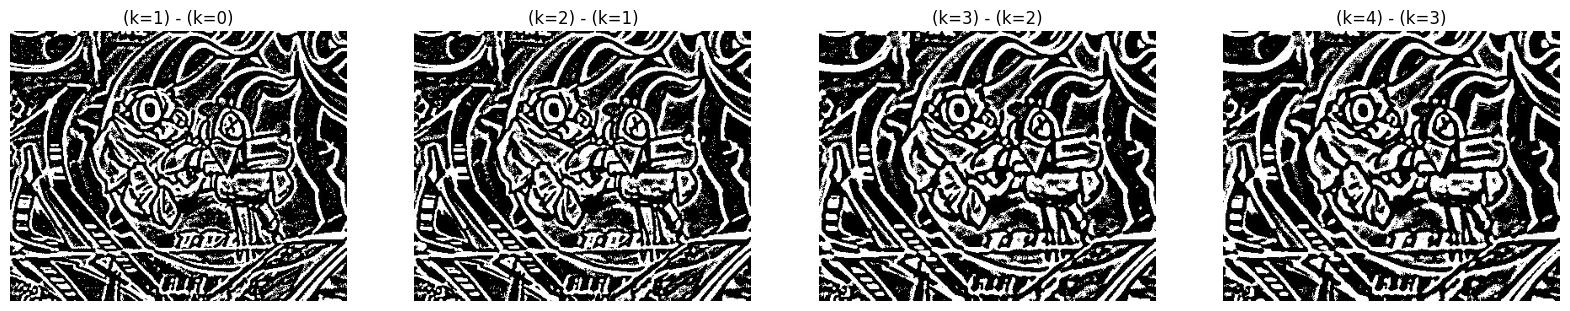

In [28]:
from itertools import pairwise

# compute the Different of gaussian and plot 4 DoGs

plt.figure(figsize=(20, 20))

for i, (current_image, next_image) in enumerate(pairwise(blurred_images)):
    diff_of_gaussian = next_image - current_image
    show_image(
        diff_of_gaussian, f"(k={i+1}) - (k={i})", 1, len(blurred_images) - 1, i + 1
    )
plt.show()

In [57]:
# Now use SIFT and show key points
image = cv2.imread("./cartoon1.pgm", cv2.IMREAD_GRAYSCALE)